7. Classifying MNIST Dataset using CNN.

In [1]:
# Step 1: Import Libraries
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Step 2: Load and Prepare the Dataset
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape the data to fit the model (28x28 images, 1 channel)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Normalize the pixel values to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode the labels (for 10 classes)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [3]:
# Step 3: Define the CNN Architecture
model = Sequential([
    # 1st Convolutional Layer
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),

    # 2nd Convolutional Layer
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten the feature maps into a 1D vector
    Flatten(),

    # Fully connected layer
    Dense(128, activation='relu'),

    # Dropout for regularization
    Dropout(0.5),

    # Output layer with 10 units (one for each class) and softmax activation
    Dense(10, activation='softmax')
])


C:\Users\ajays\anaconda3\envs\hakthon\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# Step 4: Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
# Step 5: Train the Model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.8522 - loss: 0.4685 - val_accuracy: 0.9833 - val_loss: 0.0556
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.9730 - loss: 0.0903 - val_accuracy: 0.9865 - val_loss: 0.0452
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.9813 - loss: 0.0646 - val_accuracy: 0.9893 - val_loss: 0.0384
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.9833 - loss: 0.0534 - val_accuracy: 0.9893 - val_loss: 0.0381
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.9874 - loss: 0.0400 - val_accuracy: 0.9915 - val_loss: 0.0336
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.9879 - loss: 0.0372 - val_accuracy: 0.9918 - val_loss: 0.0331
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.9913 - loss: 0.0275 - val_accuracy: 0.9912 - val_loss: 0.0396
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.9910 -

In [6]:
# Step 6: Evaluate the Model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9907 - loss: 0.0327
Test accuracy: 0.9926


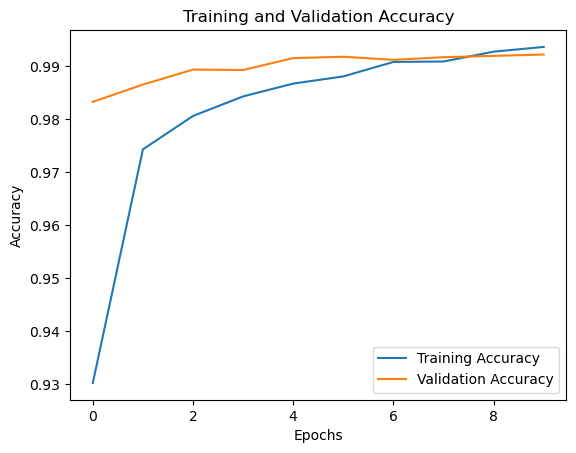

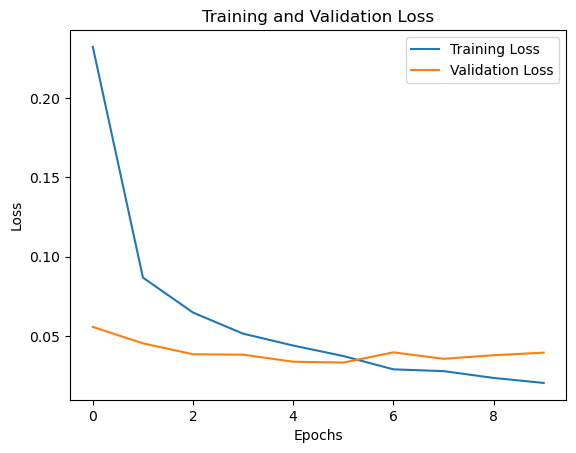

In [7]:
# Step 7: Visualize Training History
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [8]:
# Step 8: Make Predictions
# Predict the class of a single test image
new_image = x_test[0].reshape(1, 28, 28, 1)
prediction = model.predict(new_image)

# Get the predicted class
predicted_class = np.argmax(prediction)
print(f'Predicted class: {predicted_class}')

# Actual class
actual_class = np.argmax(y_test[0])
print(f'Actual class: {actual_class}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
Predicted class: 7
Actual class: 7
